<a href="https://colab.research.google.com/github/besomlu/stock_study/blob/main/5_%EC%84%B8%EA%B0%80%EC%A7%80_%EC%9E%90%EC%82%B0(SPY%2C_TLT%2C_GLD)%EB%A1%9C_%ED%98%BC%ED%95%A9_%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4_%EA%B5%AC%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.6 MB/s eta 0:00:00


<ipython-input-2-18e72c0ed926>:50: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-18e72c0ed926>:50: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-18e72c0ed926>:50: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-18e72c0ed926>:50: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-18e72c0ed926>:50: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-18e72c0ed926>:50: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-18e72c0ed926>:50: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-

1년 수익률 평균 및 표준편차 (%)
        Mean (1Y Return)  Std Dev (1Y Return)
Ticker                                       
SPY            11.817400            16.962407
TLT             4.386523            13.024110
GLD            10.715358            17.308779


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

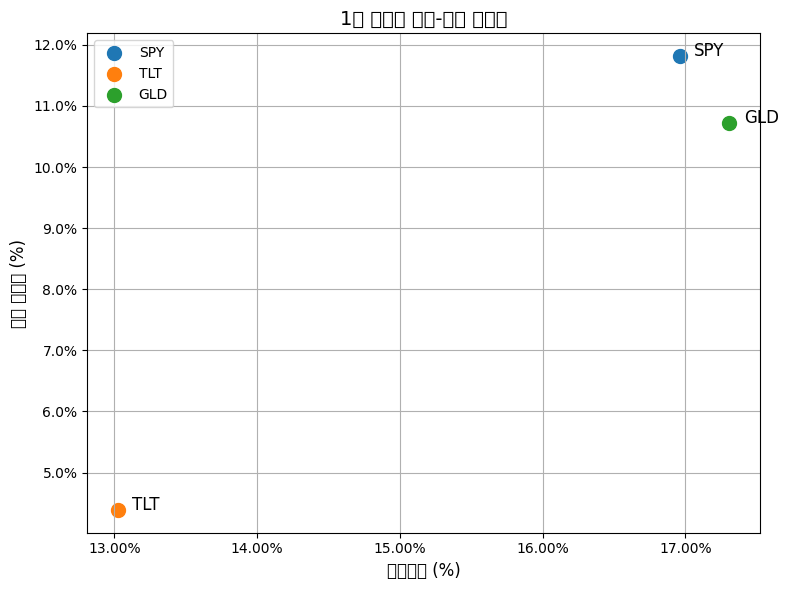

In [ ]:
# 필수 라이브러리 설치 (폰트 + FinanceDataReader)
!apt-get -qq install -y fonts-nanum
!pip install -q finance-datareader

# 1. 한글 폰트 설정 (나눔고딕)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

# 나눔고딕 폰트를 matplotlib에 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 2~3. SPY, TLT, GLD 수정 종가(Adj Close) 전체 데이터 불러오기
tickers = ['SPY', 'TLT', 'GLD']
data = {ticker: fdr.DataReader(ticker)['Adj Close'] for ticker in tickers}
prices = pd.concat(data, axis=1)
prices.columns.name = 'Ticker'

# 4~6. 1년 수익률(252일 기준)의 평균과 표준편차 계산
returns_1y = prices.pct_change(252)
summary = pd.DataFrame({
    'Mean (1Y Return)': returns_1y.mean() * 100,
    'Std Dev (1Y Return)': returns_1y.std() * 100
})

print("1년 수익률 평균 및 표준편차 (%)")
print(summary)

# 7~8. 평균-분산 그래프 (% 단위)
fig, ax = plt.subplots(figsize=(8, 6))
for ticker in tickers:
    x = summary.loc[ticker, 'Std Dev (1Y Return)']
    y = summary.loc[ticker, 'Mean (1Y Return)']
    ax.scatter(x, y, label=ticker, s=100)
    ax.text(x + 0.1, y, ticker, fontsize=12)

ax.set_xlabel('표준편차 (%)', fontsize=12)
ax.set_ylabel('평균 수익률 (%)', fontsize=12)
ax.set_title('1년 수익률 평균-분산 그래프', fontsize=14)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것 matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 사용하고 FinanceDataReader에도 Adj Close가 있으므로   SPY ETF의 수정 종가(Adj Close)만을 불러올 것
3. 전체 거래 기간(상장일 ~ 현재) 데이터를 사용할 것
4. SPY 1년 수익률의 평균과 표준편차를 계산할 것
5. TLT 1년 수익률의 평균과 표준편차를 계산할 것
6. GLD 1년 수익률의 평균과 표준편차를 계산할 것
7. SPY, TLT, GLD 평균-분산 그래프를 그릴 것
8. 그래프 x,y 수치는 %로 표시할 것  


1년 수익률 평균 및 표준편차 (%)
           평균 수익률       표준편차
Ticker                      
SPY     11.817399  16.962406
TLT      4.386524  13.024111
GLD     10.715358  17.308779


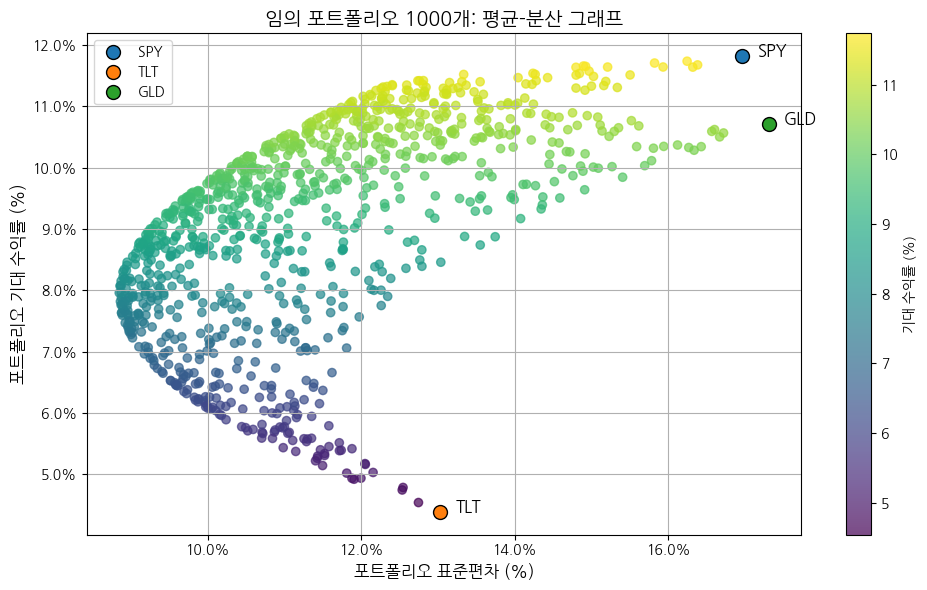

In [ ]:
# 0. 필수 패키지 설치 (나눔고딕 폰트 + FinanceDataReader)
!apt-get -qq install -y fonts-nanum
!pip install -q finance-datareader

# 1. 한글 폰트 등록 및 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import os

# 폰트 매니저에 나눔고딕 수동 등록
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for f in font_files:
    fm.fontManager.addfont(f)

# matplotlib에 적용할 기본 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 2~3. SPY, TLT, GLD 전체 기간 수정 종가 불러오기
tickers = ['SPY', 'TLT', 'GLD']
prices = pd.concat({ticker: fdr.DataReader(ticker)['Adj Close'] for ticker in tickers}, axis=1)
prices.columns.name = 'Ticker'

# 4~6. 1년 수익률 (252 거래일) 평균과 표준편차 계산
returns_1y = prices.pct_change(252)
mean_returns = returns_1y.mean() * 100  # % 단위
std_returns = returns_1y.std() * 100    # % 단위

print("1년 수익률 평균 및 표준편차 (%)")
print(pd.DataFrame({'평균 수익률': mean_returns, '표준편차': std_returns}))

# 7. 무작위 포트폴리오 1000개 시뮬레이션
np.random.seed(42)
n_portfolios = 1000
weights = np.random.dirichlet(np.ones(len(tickers)), n_portfolios)

port_returns = []
port_volatilities = []

for w in weights:
    port_return = np.dot(w, mean_returns.values)
    port_std = np.sqrt(np.dot(w.T, np.dot(returns_1y.cov().values * (100**2), w)))  # % 단위 공분산
    port_returns.append(port_return)
    port_volatilities.append(port_std)

# 8. 평균-분산 그래프 시각화 (% 단위)
fig, ax = plt.subplots(figsize=(10, 6))

sc = ax.scatter(port_volatilities, port_returns, c=port_returns, cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='기대 수익률 (%)')

# 개별 자산 점 표시
for ticker in tickers:
    x = std_returns[ticker]
    y = mean_returns[ticker]
    ax.scatter(x, y, label=ticker, s=100, edgecolor='black')
    ax.text(x + 0.2, y, ticker, fontsize=12)

ax.set_xlabel('포트폴리오 표준편차 (%)', fontsize=12)
ax.set_ylabel('포트폴리오 기대 수익률 (%)', fontsize=12)
ax.set_title('임의 포트폴리오 1000개: 평균-분산 그래프', fontsize=14)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것 matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 사용하고 FinanceDataReader에도 Adj Close가 있으므로   SPY ETF의 수정 종가(Adj Close)만을 불러올 것
3. 전체 거래 기간(상장일 ~ 현재) 데이터를 사용할 것
4. SPY 1년 수익률의 평균과 표준편차를 계산할 것
5. TLT 1년 수익률의 평균과 표준편차를 계산할 것
6. GLD 1년 수익률의 평균과 표준편차를 계산할 것
7. SPY, TLT, GLD 세 자산에 대해서 임의 비중으로 투자하는 포트폴리오 1000개를 점으로 그릴 것.
8. 그래프 x,y 수치는 %로 표시할 것  

1년 수익률 평균 및 표준편차 (%)
           평균 수익률       표준편차
Ticker                      
SPY     11.817400  16.962406
TLT      4.386524  13.024110
GLD     10.715358  17.308779


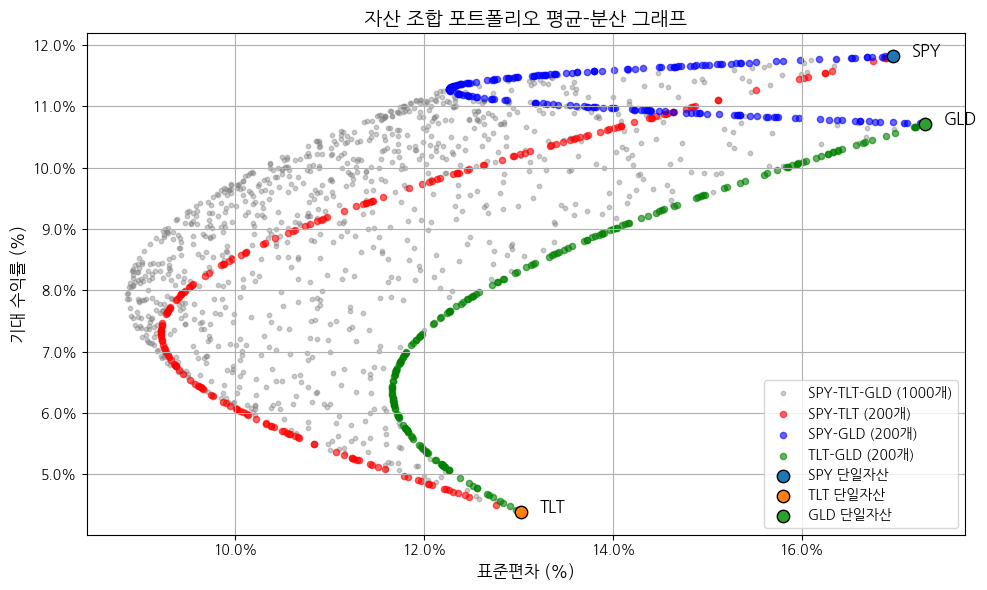

In [ ]:
# 0. 필수 패키지 설치
!apt-get -qq install -y fonts-nanum
!pip install -q finance-datareader

# 1. 한글 폰트 등록 및 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

# 폰트 매니저에 나눔고딕 등록
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for f in font_files:
    fm.fontManager.addfont(f)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2~3. 전체 기간 수정 종가 불러오기
tickers = ['SPY', 'TLT', 'GLD']
prices = pd.concat({t: fdr.DataReader(t)['Adj Close'] for t in tickers}, axis=1)
prices.columns.name = 'Ticker'

# 4~6. 1년 수익률(252일 수익률)의 평균과 표준편차 계산
returns_1y = prices.pct_change(252)
mean_returns = returns_1y.mean() * 100
std_returns = returns_1y.std() * 100

print("1년 수익률 평균 및 표준편차 (%)")
print(pd.DataFrame({'평균 수익률': mean_returns, '표준편차': std_returns}))

# 7. 세 자산 조합 포트폴리오 1000개
np.random.seed(0)
n_random = 1000
weights_all = np.random.dirichlet(np.ones(3), n_random)

port_returns_all = []
port_stds_all = []

cov_matrix = returns_1y.cov().values * 100**2  # % 기준 공분산

for w in weights_all:
    ret = np.dot(w, mean_returns)
    std = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
    port_returns_all.append(ret)
    port_stds_all.append(std)

# 8. 두 자산 조합별 포트폴리오 200개씩
def simulate_2asset_portfolios(t1, t2, n=200):
    mean = mean_returns[[t1, t2]].values
    cov = returns_1y[[t1, t2]].cov().values * 100**2

    weights = np.random.dirichlet(np.ones(2), n)
    rets, stds = [], []
    for w in weights:
        r = np.dot(w, mean)
        s = np.sqrt(np.dot(w.T, np.dot(cov, w)))
        rets.append(r)
        stds.append(s)
    return stds, rets

std_12, ret_12 = simulate_2asset_portfolios('SPY', 'TLT')
std_13, ret_13 = simulate_2asset_portfolios('SPY', 'GLD')
std_23, ret_23 = simulate_2asset_portfolios('TLT', 'GLD')

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 세 자산 포트폴리오
ax.scatter(port_stds_all, port_returns_all, c='gray', alpha=0.4, label='SPY-TLT-GLD (1000개)', s=10)

# 두 자산 조합 포트폴리오
ax.scatter(std_12, ret_12, c='red', alpha=0.6, label='SPY-TLT (200개)', s=20)
ax.scatter(std_13, ret_13, c='blue', alpha=0.6, label='SPY-GLD (200개)', s=20)
ax.scatter(std_23, ret_23, c='green', alpha=0.6, label='TLT-GLD (200개)', s=20)

# 개별 자산 점
for t in tickers:
    ax.scatter(std_returns[t], mean_returns[t], label=f'{t} 단일자산', s=80, edgecolor='black')
    ax.text(std_returns[t] + 0.2, mean_returns[t], t, fontsize=12)

# 포맷
ax.set_title('자산 조합 포트폴리오 평균-분산 그래프', fontsize=14)
ax.set_xlabel('표준편차 (%)', fontsize=12)
ax.set_ylabel('기대 수익률 (%)', fontsize=12)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것 matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 사용하고 FinanceDataReader에도 Adj Close가 있으므로   SPY ETF의 수정 종가(Adj Close)만을 불러올 것
3. 전체 거래 기간(상장일 ~ 현재) 데이터를 사용할 것
4. SPY 1년 수익률의 평균과 표준편차를 계산할 것
5. TLT 1년 수익률의 평균과 표준편차를 계산할 것
6. GLD 1년 수익률의 평균과 표준편차를 계산할 것
7. SPY, TLT, GLD 세 자산에 대해서 임의 비중으로 투자하는 포트폴리오 1000개를 점으로 그릴 것.
8. 이중 두 자산을 혼합한 각 포트폴리오를 200개씩 그릴 것
8. 그래프 x,y 수치는 %로 표시할 것  



```
# 코드로 형식 지정됨
```

표준편차 10% 수준에서 가장 높은 수익률을 얻기 위해서는 세 자산의 비중을 어떻게 가져가야 할까?

In [ ]:
import numpy as np
from scipy.optimize import minimize

# 기대 수익률과 공분산 행렬 (이미 앞 코드에서 계산됨)
mu = mean_returns.values         # shape (3,) - in percent
cov = returns_1y.cov().values * 100**2  # % 기준 공분산, shape (3, 3)

# 목표: 리스크 10%에서 수익률 최대화
target_std = 10.0  # %

# 목적 함수: 음의 기대 수익률 (maximize -> minimize(-R))
def neg_expected_return(weights):
    return -np.dot(weights, mu)

# 제약 조건: 표준편차 == 10%
def std_constraint(weights):
    return target_std - np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

# 제약 조건: 비중의 합 == 1
constraints = [
    {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
    {'type': 'eq', 'fun': std_constraint}
]

# 비중은 0~1 사이
bounds = [(0, 1) for _ in range(3)]

# 초기 guess
x0 = np.array([1/3, 1/3, 1/3])

# 최적화
result = minimize(neg_expected_return, x0=x0, bounds=bounds, constraints=constraints)

# 결과 출력
if result.success:
    opt_weights = result.x
    opt_return = np.dot(opt_weights, mu)
    opt_std = np.sqrt(np.dot(opt_weights.T, np.dot(cov, opt_weights)))

    print("✅ 표준편차 10% 조건에서 최대 기대 수익률 포트폴리오:")
    for t, w in zip(['SPY', 'TLT', 'GLD'], opt_weights):
        print(f"  {t}: {w:.2%}")
    print(f"\n📈 기대 수익률: {opt_return:.2f}%")
    print(f"📉 표준편차: {opt_std:.2f}%")
else:
    print("❌ 최적화 실패:", result.message)


✅ 표준편차 10% 조건에서 최대 기대 수익률 포트폴리오:
  SPY: 45.94%
  TLT: 22.83%
  GLD: 31.22%

📈 기대 수익률: 9.78%
📉 표준편차: 10.00%
